In [2]:
import pandas as pd
from PIL import Image
import os
import numpy as np

In [3]:
images_path = '../images'
population_data_path = '../data/full_data.csv'

In [4]:
def crop_and_resize(image: Image.Image, size: int) -> Image.Image:
    """
    Crop a PIL image to a square by trimming the longer side and centering,
    then resize it to the designated resolution.
    
    :param image: Input PIL Image
    :param size: Target resolution (size x size)
    :return: Processed PIL Image
    """
    width, height = image.size
    min_side = min(width, height)
    
    # Calculate crop box for center cropping
    left = (width - min_side) // 2
    top = (height - min_side) // 2
    right = left + min_side
    bottom = top + min_side
    
    # Crop to square
    cropped_image = image.crop((left, top, right, bottom))
    
    # Resize to designated resolution
    resized_image = cropped_image.resize((size, size), Image.LANCZOS)
    
    return resized_image

Loaded 207 images


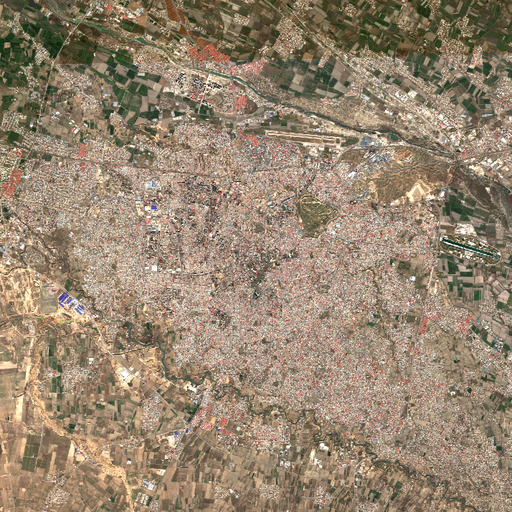

In [5]:
images = []

for dir in os.listdir(images_path):
    if not dir.endswith('.png'):
        continue
    
    full_path = f'{images_path}/{dir}'
    image = Image.open(full_path)
    square_image = crop_and_resize(image, 512)
    images.append(square_image)
    
print(f'Loaded {len(images)} images')
images[0]

In [6]:
# tutaj zamieniam listę zdjęć na np.array
# dzielę zdjęcia przez 255 żeby mieć wartości między 0 i 1
# array ma wymiary [ilość zdjęć, 512, 512, 3]

X = np.array([np.array(img) / 255 for img in images])
print(X.shape)
print(X[0])

(207, 512, 512, 3)
[[[0.3372549  0.29803922 0.21176471]
  [0.25882353 0.23921569 0.18039216]
  [0.31764706 0.29019608 0.21960784]
  ...
  [0.31764706 0.30588235 0.18431373]
  [0.30196078 0.29019608 0.16862745]
  [0.41176471 0.35686275 0.24705882]]

 [[0.36862745 0.31372549 0.23529412]
  [0.3254902  0.29019608 0.21568627]
  [0.36470588 0.3372549  0.24313725]
  ...
  [0.28235294 0.24313725 0.14901961]
  [0.33333333 0.24705882 0.16862745]
  [0.36470588 0.26666667 0.18039216]]

 [[0.43921569 0.37254902 0.27843137]
  [0.40784314 0.34509804 0.24705882]
  [0.38823529 0.3372549  0.24705882]
  ...
  [0.3254902  0.25882353 0.16470588]
  [0.3254902  0.23529412 0.16078431]
  [0.33333333 0.23921569 0.14509804]]

 ...

 [[1.         0.86666667 0.65490196]
  [0.99607843 0.85098039 0.64705882]
  [0.76470588 0.58431373 0.46666667]
  ...
  [0.6745098  0.51372549 0.43529412]
  [0.61960784 0.5254902  0.45098039]
  [0.58823529 0.50980392 0.41176471]]

 [[0.85882353 0.69019608 0.52941176]
  [0.95686275 0.81

In [7]:
# żeby użyć dane w klasycznych modelach, trzeba prawdopodobnie zamienić je na wektory
# taki format powinien zadziałać dla regresji i drzew
# być może są jakieś modele które działają na zdjęciach
# w razie czego, sprawdź jakie wymiary są wymagane (bo być może liczba kanałów jest jako druga a nie ostatnia jak jest teraz zapisane)

X = X.reshape(-1, 512 * 512 * 3)
X.shape

(207, 786432)

In [15]:
y = pd.read_csv(population_data_path)
y = np.array(y['population']).reshape(-1, 1)
y

array([[22120000],
       [19433000],
       [15929000],
       [20902000],
       [11309000],
       [10800000],
       [ 8962000],
       [ 7981000],
       [ 7135000],
       [ 7496000],
       [ 6446000],
       [ 7194311],
       [ 7739000],
       [ 5775000],
       [ 7105000],
       [ 5690000],
       [ 4458000],
       [ 7457027],
       [ 4480000],
       [ 7674439],
       [ 4110000],
       [ 4580000],
       [ 3250000],
       [ 3398000],
       [ 7005000],
       [10784600],
       [ 6250000],
       [ 3121275],
       [ 7153300],
       [ 5319028],
       [ 5245000],
       [ 7639000],
       [ 3228000],
       [ 7100000],
       [ 4592431],
       [ 4530597],
       [ 7044118],
       [ 4365000],
       [ 3112559],
       [ 3616163],
       [ 3875000],
       [ 2046189],
       [10820000],
       [10700000],
       [23355000],
       [29617000],
       [ 9746000],
       [11324000],
       [17560000],
       [ 5807000],
       [ 7764000],
       [ 3073350],
       [ 338